In [106]:
from bs4 import BeautifulSoup
from scrapy import Selector
import requests
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [107]:
url = ' https://en.wikipedia.org/wiki/Road_safety_in_Europe'
html = requests.get(url).content

In [167]:
soup=BeautifulSoup(html)
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Road safety in Europe - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"d47d0079-e89b-4bf8-ac8b-08d40dac2ad9","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Road_safety_in_Europe","wgTitle":"Road safety in Europe","wgCurRevisionId":1033097611,"wgRevisionId":1033097611,"wgArticleId":54525757,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 errors: missing title","CS1 errors: bare URL","All articles with dead external links","Articles with dead external links

In [108]:
sel=Selector(text=html)
table_title=sel.xpath('//table[@class="wikitable sortable"]/caption/text()').extract()
table_columns=sel.xpath('//table[@class="wikitable sortable"]/tbody/tr/th/text()')
columns=[]

for col in table_columns:
    col=col.extract().replace('\n','')
    if col !='':
        columns.append(col)
columns

['Country',
 'Area',
 'Population in 2018',
 'GDP per capita in 2018',
 'Population density',
 'Vehicle ownership',
 'Road Network Length',
 'Total Road Deaths in 2018',
 'Road deaths',
 'Number of People Killed',
 'Number of Seriously Injured in 2017/2018']

In [109]:
table_countries=sel.xpath('//table[@class="wikitable sortable"]/tbody/tr/td/b/text()')
countries=[]
for country in table_countries:
    countries.append(country.extract())

In [110]:
table_data=sel.xpath('//table[@class="wikitable sortable"]/tbody/tr/td/text()')
clean_list=[]
#get clean data
for data in table_data:
    data=data.extract().strip()
    clean_list.append(data)
while '' in clean_list:
    clean_list.remove('')

In [111]:
#divide the data
all_rows=[]
rows=[]
for i in range(len(clean_list)):
    rows.append(clean_list[i])
    if i%10==9:
        all_rows.append(rows)
        rows=[]


In [112]:
#add country to the data row
for i in range(len(countries)):
    all_rows[i].insert(0,countries[i])

In [174]:
#creating pandas dataframe

df=pd.DataFrame(data=all_rows,columns=columns)
df['Road deaths per Million Inhabitants'] = df['Road deaths']
df['GDP per capita in 2018']=df['GDP per capita in 2018'].str.replace('†','')
df['Year']=2018
df=df.drop(columns=['Road Network Length','Number of People Killed','Number of Seriously Injured in 2017/2018','Road deaths'])
df=df.sort_values(by=['Road deaths per Million Inhabitants'])
df.to_csv("data/wiki_data.csv",index=False)


In [299]:
df=pd.read_csv("data/wiki_data.csv")
df

,Country,Area,Population in 2018,GDP per capita in 2018,Population density,Vehicle ownership,Total Road Deaths in 2018,Road deaths per Million Inhabitants,Year
0,United Kingdom,248.5,"66,273,576","32,400",273,544,"1,825",28,2018
1,Denmark,42.9,"5,781,190","47,600",137,508,175,30,2018
2,Netherlands,41.5,"17,181,084","41,500",508,543,678,31,2018
3,Ireland,69.8,"4,830,392","59,400",70,525,146,31,2018
4,Sweden,438.6,"10,120,242","43,300",25,542,324,32,2018
5,Malta,0.3,"475,701","21,600","1,462",726,18,38,2018
6,Spain,506.0,"46,658,447","25,000",93,611,"1,806",39,2018
7,Germany,357.3,"82.792,351","35,900",237,610,"3,177",39,2018
8,Finland,338.4,"5,513,130","36,600",18,732,225,43,2018
9,Slovenia,20.3,"2,066,880","20,200",103,587,91,44,2018


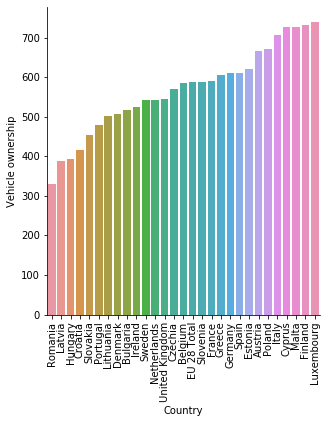

In [288]:
#visualizing countries and the number of vehicle owners
df=df.sort_values(by='Vehicle ownership')
chart=sns.catplot(x='Country',y='Vehicle ownership',data=df,kind='bar')
chart.set_xticklabels(df['Country'], rotation=90)
plt.savefig("country_vrs_vehicleOwnership")
plt.show()

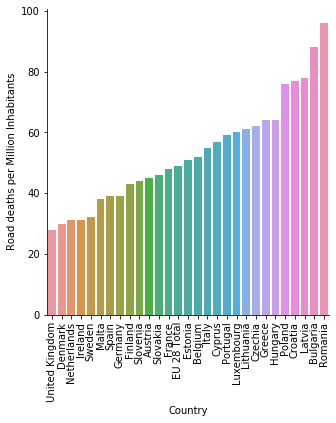

In [248]:
#visualizing Country and road death per Million Inhabitants
chart=sns.catplot(x='Country',y='Road deaths per Million Inhabitants',data=df,kind='bar')
chart.set_xticklabels(df['Country'], rotation=90)
plt.savefig("country_vrs_death_per_Million")
plt.show()

In [301]:
#doing more cleaning

df['Total Road Deaths in 2018']=df['Total Road Deaths in 2018'].str.replace(',','')
df['Total Road Deaths in 2018']=pd.to_numeric(df['Total Road Deaths in 2018'])
df['Population in 2018']=df['Population in 2018'].str.replace(',','')
df['Population in 2018']=pd.to_numeric(df['Population in 2018'],downcast='integer')
df['GDP per capita in 2018']=df['GDP per capita in 2018'].str.replace(',','')
df['GDP per capita in 2018']=pd.to_numeric(df['GDP per capita in 2018'])


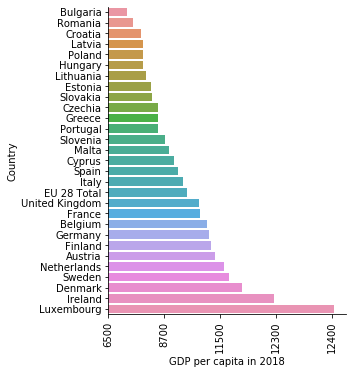

In [304]:
#visualizing gdp per capita
df=df.sort_values(by=['GDP per capita in 2018'])
chart=sns.catplot(x='GDP per capita in 2018',y='Country',data=df,kind='bar')
chart.set_xticklabels(df['GDP per capita in 2018'], rotation=90)
plt.savefig("country_vrs_gdp_per_capita")
plt.show()

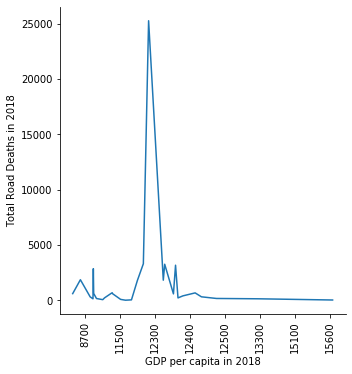

In [307]:
#does gdp affect road deaths or number of vehicle ownership
df=df.sort_values(by=['GDP per capita in 2018'])
chart=sns.relplot(x='GDP per capita in 2018',y='Total Road Deaths in 2018',data=df,kind='line')
chart.set_xticklabels(df['GDP per capita in 2018'], rotation=90)
plt.savefig("gdp_vrs_road_deaths")
plt.show()

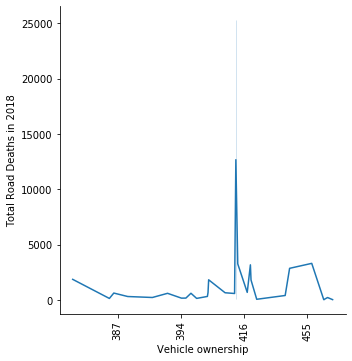

In [308]:
df=df.sort_values(by=['Vehicle ownership'])
chart=sns.relplot(x='Vehicle ownership',y='Total Road Deaths in 2018',data=df,kind='line')
chart.set_xticklabels(df['Vehicle ownership'], rotation=90)
plt.savefig("vehicle_ownership_vrs_road_deaths")
plt.show()